# Image processing tutorial - Carol Webster

Suppose you're given a bunch of images to analyse. What do you do first?

## Load an image into Numpy

This image was captured on an optical microscope. It is an image at 100x magnification of an array of nanopatterned pillars (looking down on the tops of the pillars).

In [1]:
import numpy as np
from skimage import io

# Read image into Numpy array
img = io.imread("4um_100nmstep4_Right Dish_R_p00_z60_0_A01f04d3.TIF")
type(img)

numpy.ndarray

## Find out how many pixels it has and how many channels

The image we just loaded in is a monochrome image, so it has only one channel. It is a 2D array. If it was a colour image it would have three channels for red, green and blue intensities.

https://en.wikipedia.org/wiki/RGB_color_model

In [2]:
img.shape

(1048, 1328)

Now let's load in a colour image. We now have a 3D array with 3 colour channels.

N.B. This image came from https://www.pexels.com/photo/photo-of-rainbow-colored-painting-on-canvas-1704119/

In [3]:
img_colour = io.imread("RainbowPaint_Pexels.jpeg")
img_colour.shape

(365, 500, 3)

## Take a look at the pixel values and number of bits per pixel

We'll start by looking at a small portion of the monochrome image. Notice that it is a 16-bit image (dtype=uint16).

In [4]:
img[:4, :10]

array([[739, 716, 702, 688, 689, 706, 657, 704, 663, 638],
       [744, 715, 727, 734, 693, 707, 706, 671, 669, 680],
       [713, 699, 733, 720, 721, 724, 726, 704, 655, 678],
       [730, 725, 739, 691, 722, 720, 730, 704, 701, 712]], dtype=uint16)

Now let's look at the pixel values in a small portion of each channel of the colour image. Notice that it is an 8-bit image (dtype=uint8).

In [5]:
img_colour[230:234, 220:230, 0]    # Red channel

Array([[253, 253, 254, 254, 248, 246, 250, 247, 255, 232],
       [254, 254, 254, 255, 255, 249, 254, 255, 255, 231],
       [253, 254, 254, 254, 248, 248, 245, 255, 255, 243],
       [252, 252, 253, 253, 252, 253, 244, 252, 255, 253]], dtype=uint8)

In [6]:
img_colour[230:234, 220:230, 1]    # Blue channel

Array([[229, 229, 230, 229, 225, 227, 228, 214, 226, 226],
       [230, 230, 230, 231, 237, 233, 237, 225, 231, 221],
       [231, 230, 230, 230, 229, 232, 228, 232, 230, 225],
       [230, 230, 229, 229, 227, 232, 227, 230, 229, 228]], dtype=uint8)

In [7]:
img_colour[230:234, 220:230, 2]    # Green channel

Array([[ 7,  9, 10, 12,  0,  0,  0,  0, 10, 78],
       [ 8, 10, 10, 11,  3,  0,  1,  0, 16, 62],
       [ 8,  8, 10, 10,  2,  0,  0,  0, 12, 53],
       [ 7,  7,  9,  9, 10,  5,  0,  0,  8, 37]], dtype=uint8)

## Find out how many bits the camera used (could be less than 16 in a 16-bit image)

We'll do this for the 16-bit monochrome image. In the 8-bit colour image, the camera will probably have used all 8 bits.

In [8]:
np.max(img)   # maximum pixel value

2073

It looks like the camera on the microscope where the monochrome image was captured was using 12 bits.

In [9]:
2**12 - 1     # an n-bit image has pixel values between 0 and 2**n - 1

4095

##  Plot the image

Matplotlib renormalises the pixel values before plotting, so the monochrome image doesn't look black even though the pixel values are at the low end of the range for 16 bits.

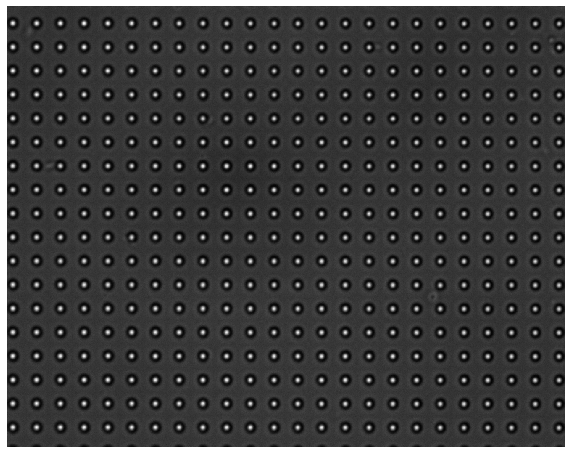

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")
plt.axis('off');

Let's plot the colour image as well.

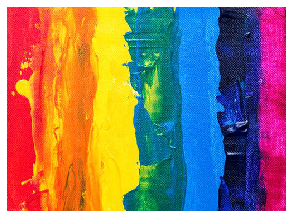

In [11]:
plt.figure(figsize=(5, 5))
plt.imshow(img_colour)
plt.axis('off');

Let's have a look at what each colour channel looks like.

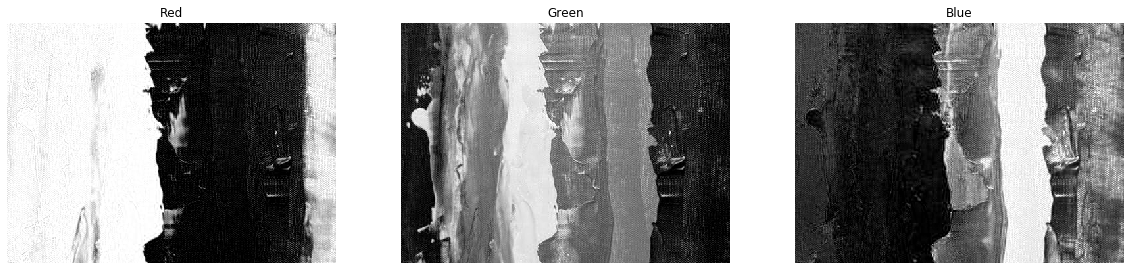

In [12]:
plt.figure(figsize=(20, 30))

plt.subplot(1, 3, 1)
plt.imshow(img_colour[:, :, 0], cmap='gray')
plt.title("Red")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_colour[:, :, 1], cmap='gray')
plt.title("Green")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_colour[:, :, 2], cmap='gray')
plt.title("Blue")
plt.axis('off');

## Plot a histogram of pixel values

Let's concentrate on the monochrome image. For the colour image, we could plot a separate histogram for each channel if we wanted to see the distribution of pixel values.

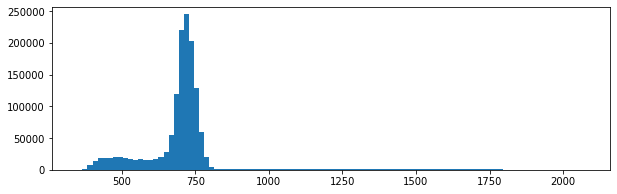

In [13]:
plt.figure(figsize=(10, 3))
plt.hist(img.ravel(), bins=100); # need to unravel image into 1D array to plot histogram

## Normalise image for use with machine learning algorithms

Normalise to maximum pixel value

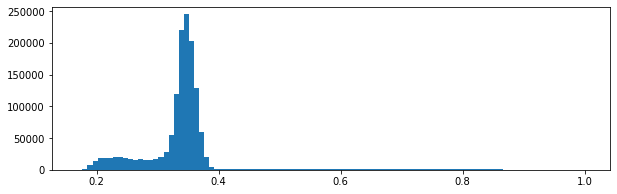

In [14]:
img_norm = img/np.max(img)

plt.figure(figsize=(10, 3))
plt.hist(img_norm.ravel(), bins=100);

## Adjust contrast using CLAHE (Contrast Limited Adaptive Histogram Equalisation)

https://en.wikipedia.org/wiki/Adaptive_histogram_equalization

Try playing around with clip_limit. A value of 0.001 doesn't change the original contrast much. A value of 0.05 produces a much higher contrast image.

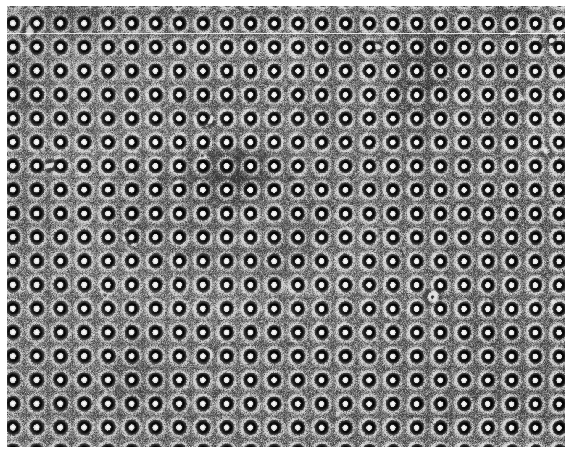

In [15]:
import skimage

img_clahe = skimage.exposure.equalize_adapthist(img, kernel_size=None, clip_limit=0.05, nbins=256)

plt.figure(figsize=(10, 10))
plt.imshow(img_clahe, cmap="gray")
plt.axis('off');

Look what has happened to the histogram!

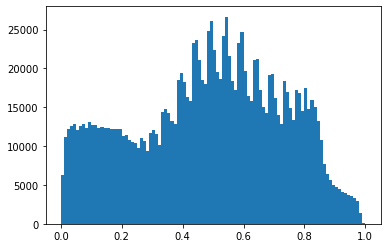

In [16]:
plt.hist(img_clahe.ravel(), bins=100);

## Centre-crop image

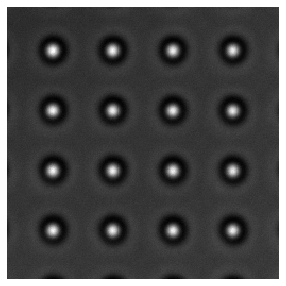

In [17]:
# Centre-crop to square of specified width (in pixels)
def crop_square(img, width):
    rows = img.shape[0]
    cols = img.shape[1]
    centre_row = rows // 2
    centre_col = cols // 2
    if len(img.shape) == 2:   # if grayscale
        img_cropped = img[centre_row - width // 2 : centre_row + width // 2, centre_col - width // 2 : centre_col + width // 2]
    elif len(img.shape) == 3: # if rgb
        img_cropped = img[centre_row - width // 2 : centre_row + width // 2, centre_col - width // 2 : centre_col + width // 2, :]
    return img_cropped

img_cropped = crop_square(img, 256)

plt.figure(figsize=(5, 5))
plt.imshow(img_cropped, cmap="gray")
plt.axis('off');

## Extract information on periodicity with Fast Fourier Transform (FFT)

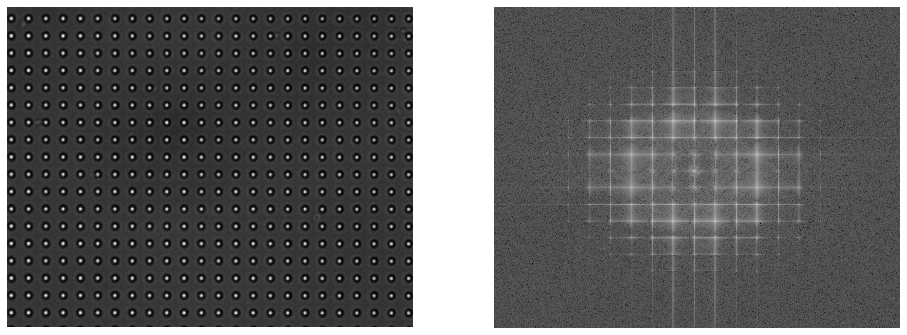

In [18]:
from scipy.fftpack import fft2

# Make sure pixel values are stored as floats rather than integers, so they don't get truncated during calculations.
img_float = img.astype(float) 

# Take 2D FFT
fft = fft2(img_float)

# Swap around the four quarters of the 2D FFT output to ensure zeroth harmonic is central:
def centrefft(fft):
    rows, cols = np.shape(fft)
    halfrows = rows // 2
    halfcols = cols // 2
    fft_tl = fft[:halfrows,:halfcols]
    fft_tr = fft[:halfrows,halfcols:]
    fft_bl = fft[halfrows:,:halfcols]
    fft_br = fft[halfrows:,halfcols:]
    fftc = np.concatenate((np.concatenate((fft_br, fft_bl), axis=1), np.concatenate((fft_tr, fft_tl), axis=1)), axis = 0)
    return fftc

fftc = centrefft(fft)

# Take abs, as fft elements are complex numbers.
fftc = abs(fftc)

# Put on log scale to enhance small numbers. 
fftce = 20*np.log10(fftc)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(fftce[340:700, 440:895], cmap='gray')    # Plot the central portion of the FFT
plt.axis('off');

## Time to do the analysis

We've explored some typical pre-processing steps for images. We can now apply some of these steps to a whole data set of images. Next, we need to decide what kind of analysis we're going to do on our images.

We could do:

* Convolutional neural network classifier
* Object detection
* Segmentation
* Feature extraction
* ... etc.